# Transfer Learning InceptionV3 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'coffee-datasets/symptom/train'
valid_path = 'coffee-datasets/symptom/test'

In [4]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('coffee-datasets/symptom/train/*')

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('coffee-datasets/symptom/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1539 images belonging to 5 classes.


In [13]:
test_set = test_datagen.flow_from_directory('coffee-datasets/symptom/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 335 images belonging to 5 classes.


In [14]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
49/49 [==============================] - 61s 1s/step - loss: 5.0029 - accuracy: 0.6329 - val_loss: 0.9311 - val_accuracy: 0.8418
Epoch 2/10
49/49 [==============================] - 69s 1s/step - loss: 0.8448 - accuracy: 0.8785 - val_loss: 0.8435 - val_accuracy: 0.8836
Epoch 3/10
49/49 [==============================] - 64s 1s/step - loss: 0.3698 - accuracy: 0.9194 - val_loss: 0.6755 - val_accuracy: 0.9015
Epoch 4/10
49/49 [==============================] - 61s 1s/step - loss: 0.5091 - accuracy: 0.9175 - val_loss: 0.9762 - val_accuracy: 0.8657
Epoch 5/10
49/49 [==============================] - 62s 1s/step - loss: 0.6508 - accuracy: 0.9077 - val_loss: 1.5893 - val_accuracy: 0.8418
Epoch 6/10
49/49 [==============================] - 62s 1s/step - loss: 0.5109 - accuracy: 0.9201 - val_loss: 1.5867 - val_accuracy: 0.8567
Epoch 7/10
49/49 [==============================] - 61s 1s/step - loss: 0.3886 - acc

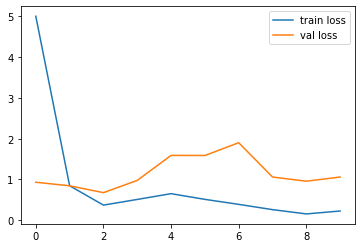

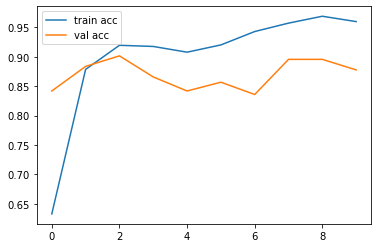

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [17]:
y_pred = model.predict(test_set)

In [18]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:

model=load_model('model_inception.h5')

In [20]:
img=image.load_img('coffee-datasets/symptom/test/4_phoma/2.jpg',target_size=(224,224))

In [21]:
x=image.img_to_array(img)
x

array([[[142., 131., 127.],
        [143., 132., 128.],
        [144., 133., 129.],
        ...,
        [122., 134.,  36.],
        [126., 138.,  40.],
        [127., 139.,  41.]],

       [[143., 132., 128.],
        [143., 132., 128.],
        [144., 133., 129.],
        ...,
        [122., 134.,  36.],
        [126., 138.,  40.],
        [128., 140.,  42.]],

       [[143., 132., 128.],
        [144., 133., 129.],
        [144., 133., 129.],
        ...,
        [125., 137.,  39.],
        [124., 136.,  38.],
        [125., 137.,  39.]],

       ...,

       [[129., 118., 116.],
        [128., 117., 115.],
        [128., 117., 115.],
        ...,
        [ 77.,  83.,  19.],
        [ 75.,  81.,  17.],
        [ 75.,  81.,  17.]],

       [[129., 118., 116.],
        [128., 117., 115.],
        [127., 116., 114.],
        ...,
        [ 77.,  83.,  19.],
        [ 75.,  81.,  17.],
        [ 75.,  81.,  17.]],

       [[127., 117., 115.],
        [127., 117., 115.],
        [127., 1

In [22]:
x.shape

(224, 224, 3)

In [23]:
x=x/255

In [24]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [25]:

model.predict(img_data)

array([[3.1321041e-02, 1.2572377e-04, 9.6846730e-01, 1.3595790e-05,
        7.2241717e-05]], dtype=float32)

In [26]:
prediction=np.argmax(model.predict(img_data), axis=1)

In [27]:
class_dict = training_set.class_indices
class_dict

{'1_health': 0, '2_miner': 1, '3_rust': 2, '4_phoma': 3, '5_cercospora': 4}

In [28]:
if np.argmax(prediction) == 0:
    print("health")
elif np.argmax(prediction) == 1:
    print("miner")
elif np.argmax(prediction) == 2:
    print("rust")
elif np.argmax(prediction) == 3:
    print("phoma")
else:
    print("cercospora")

health


In [29]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model("model_inception.h5")

In [30]:
prediction = model.predict([prepare("coffee-datasets/symptom/test/5_cercospora/1.JPG")])
if np.argmax(prediction) == 0:
    print("health")
elif np.argmax(prediction) == 1:
    print("miner")
elif np.argmax(prediction) == 2:
    print("rust")
elif np.argmax(prediction) == 3:
    print("phoma")
else:
    print("cercospora")

cercospora


## Thank You